<h1 style="text-align:center;">Multi-Company Stock Price Prediction: A Deep Learning Approach</h1>

* <u>**Author**</u> **:**[Younes Dahami](https://www.linkedin.com/in/dahami/)

![](big_tech.jpeg)

In this notebook, we'll construct a "Stock Price Prediction" project employing `TensorFlow`. Analyzing stock market prices involves a **timeseries** approach, well-suited for implementation with a Recurrent Neural Network (RNN).

To execute this, we'll utilize TensorFlow, an open-source Python framework renowned for its powerful capabilities in Deep Learning and Machine Learning tasks.

# 1) Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler 
import tensorflow as tf
from tensorflow import keras

import os
import opendatasets as od
from datetime import datetime

import warnings 
warnings.filterwarnings("ignore") 

Let's download the dataset as pandas dataframe :

In [2]:
# download the dataset from kaggle
url = "https://www.kaggle.com/datasets/rohitjain454/all-stocks-5yr"
od.download(url, data_dir="./all-stocks-5yr")

Skipping, found downloaded files in "./all-stocks-5yr\all-stocks-5yr" (use force=True to force download)


In [3]:
df = pd.read_csv("./all-stocks-5yr/all_stocks_5yr.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
# shape 
print(df.shape)

# Sample of 6 rows
df.sample(6)

(619040, 7)


,date,open,high,low,close,volume,Name
361176,2017-11-03,119.69,121.5800,119.610,121.55,4043277,MAR
364595,2016-06-06,96.40,96.9744,95.980,96.64,2160834,MA
119047,2016-12-13,79.25,79.6000,78.040,78.36,579595,CINF
440990,2016-10-17,1436.63,1443.3600,1429.600,1437.65,263753,PCLN
187869,2017-03-02,34.19,34.3300,33.745,33.91,4698206,EBAY
232290,2017-06-09,46.75,47.4300,46.600,47.30,1737679,FLS


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


Since the given data consists of a `date` feature, that is an "object" data type, let's convert the column `date` into DateTime data type :

In [6]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


# 2) Exploratory Data Analysis

Let's delve into data analysis by visualizing and manipulating data. For this endeavor, we'll focus on renowned companies such as **Nvidia, Google, Apple, Facebook,** and more.

Our initial step involves visualizing the distribution of open and closed stock prices over a span of 5 years for selected companies.

In [7]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [8]:
df_grouped = df.groupby("Name")[["open", "close"]].mean()
df_grouped

,open,close
Name,,
A,49.187863,49.202025
AAL,38.390495,38.393252
AAP,132.439631,132.433463
AAPL,109.055429,109.066698
ABBV,60.802801,60.864440
...,...,...
XYL,41.415473,41.434095
YUM,75.422099,75.451009
ZBH,105.542014,105.606291


In [9]:
df_grouped.index.isin(["NVDA"]).sum()

1

In [10]:
# Nvidia
df_grouped.loc["NVDA"]

open     56.316546
close    56.369368
Name: NVDA, dtype: float64

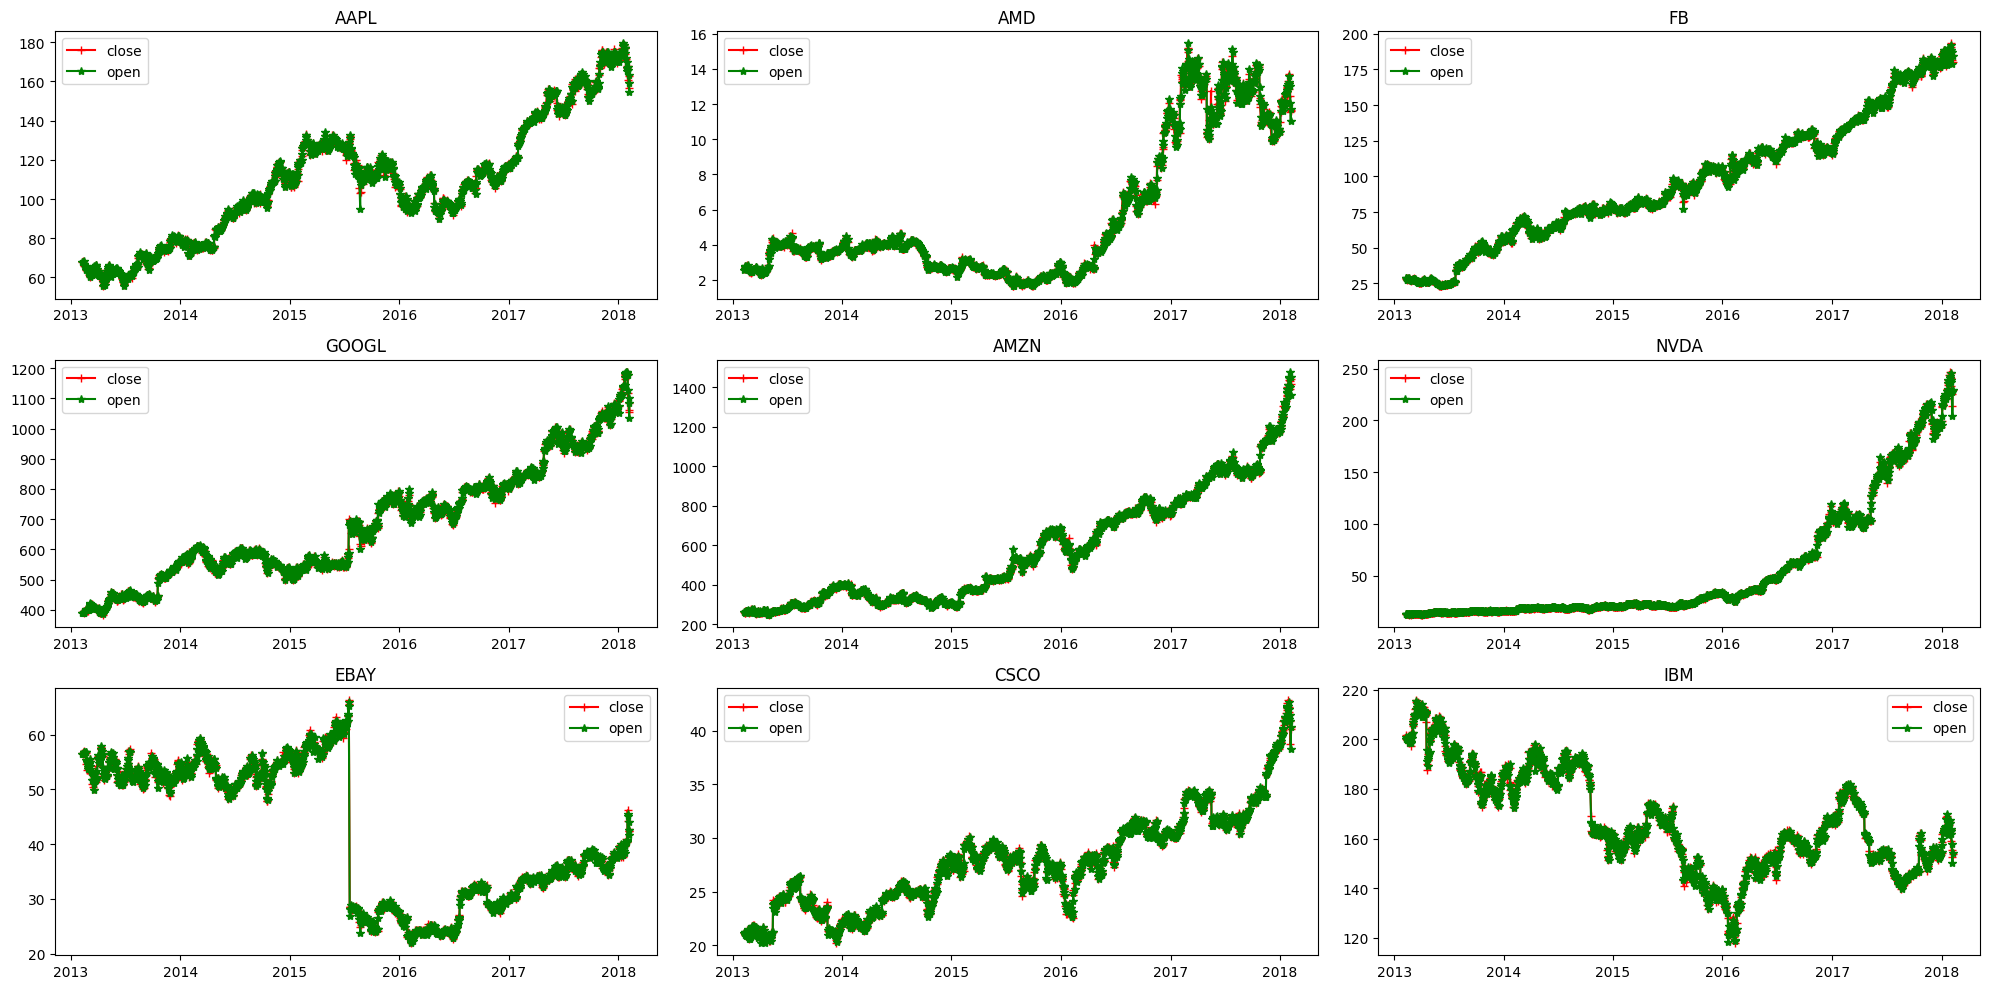

In [11]:
# date vs open & date vs close
plt.figure(figsize=(20,10))

companies = ["AAPL", "AMD", "FB", "GOOGL", "AMZN", "NVDA", "EBAY", "CSCO", "IBM"]

for index, company in enumerate(companies, start=1) :
    # 9 plots : 3 by 3
    plt.subplot(3,3, index)
    
    # dataframe of company
    c = df[df["Name"] == company]
    
    # plotting "close" of the company
    plt.plot(c["date"], c["close"], c = "r", label = "close", marker = "+")
    
    # plotting "open" of the company
    plt.plot(c["date"], c["open"], c ="g", label = "open", marker = "*")
    plt.title(company)
    plt.legend()
    plt.tight_layout()

Now let’s plot the volume of trade for these 9 stocks as well as a function of time.

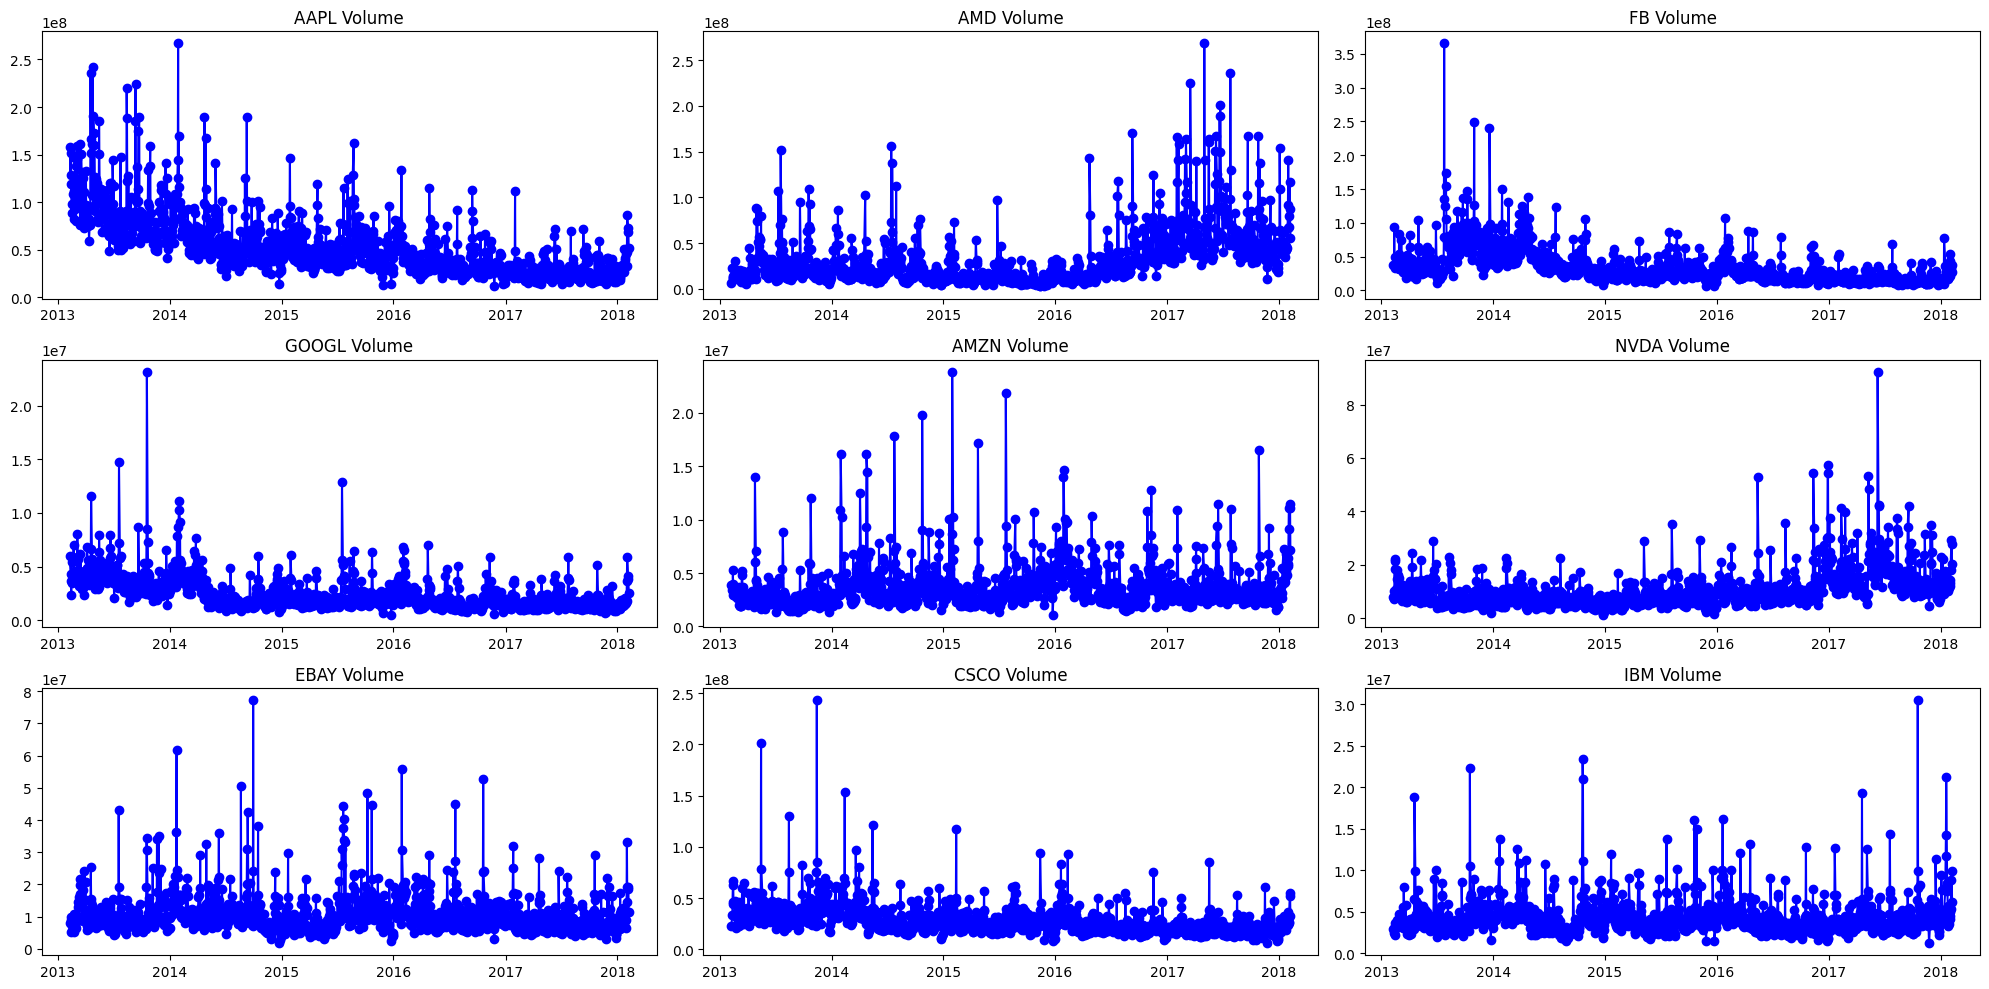

In [12]:
plt.figure(figsize=(20,10))

for index, company in enumerate(companies, 1) :
    plt.subplot(3,3,index)
    c = df[df["Name"] == company]
    
    plt.plot(c["date"], c["volume"], c = "blue", marker = "o")
    plt.title(f"{company} Volume")
    plt.tight_layout()

Now let’s analyze the data for Apple Stocks from 2013 to 2018 :

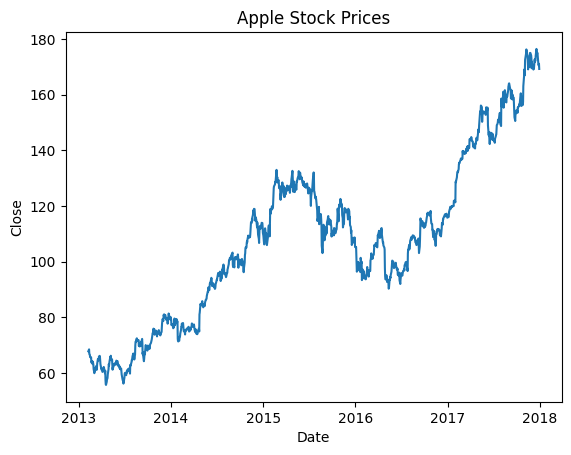

In [13]:
apple_df = df[df["Name"] == "AAPL"]

apple_2013_2018 = apple_df.loc[(apple_df['date'] > datetime(2013,1,1)) & (apple_df["date"]<datetime(2018,1,1))]

# Plotting Apple close between 2013 and 2018
plt.plot(apple_2013_2018["date"], apple_2013_2018["close"])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")

plt.show()


# 3) Building the model

## 3-1) Splitting into trainining and validation datasets

Now let’s select a subset of the whole data as the training data, the remaining data left will be for the validation part.

In [24]:
apple_close = apple_df.filter(["close"])
dataset_apple = apple_close.values

# 85% training  
training_apple = int(np.ceil(len(dataset_apple) * .85))
print(f"The number of obesrvation for the training is {training_apple}, meanwhile the remaining\
    {len(dataset_apple)-training_apple} will be for validation")

The number of obesrvation for the training is 1071, meanwhile the remaining    188 will be for validation


## 3-2) Scalling

Now that we have the training data length, the next thing to do is applying scaling and preparing features and labels (`X_train` and `y_train`) :

In [15]:
# Let's scale the data : making the values between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset_apple)

# Training data (85%)~1071 obs
train_data = scaled_data[0:int(training_apple), :]

# Preparing the features X and label y
X_train = []
y_train = []

for i in range(60, len(train_data)) :
    # X_train contains closes fom i-60 to i-1 (i.e. the last 60 closes)
    X_train.append(train_data[i-60:i, 0])
    # y_train contains the close of the i-th close
    y_train.append(train_data[i, 0])

# convert from list to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)    
print(X_train.shape)
print(y_train.shape)


# Reshaping from (1011, 60) ----> (1011, 60, 1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)


(1011, 60)
(1011,)
(1011, 60, 1)


# 3) Build Gated RNN-LSTM network using TensorFlow

Using TensorFlow, we can create LSTM-gated RNN cells. LSTM is used in Recurrent Neural Networks for sequence models and time series data. LSTM is used to avoid the vanishing gradient issue which widely occurres in training RNN.

**To stack multiple LSTM in TensorFlow it is mandatory to use `return_sequences = True`.** Since our data is time series varying we apply no activation to the output layer and it remains as 1 node. 

In [16]:
model = keras.models.Sequential()

# Input layer : (60,1) = (T,C)
model.add(keras.layers.Input(shape = (X_train.shape[1], 1)))

# LSTM 1 layer  : (T,C)=(60,1)  @ (None, 1,64)--->(B,60,1)  @ (B, 1,64)---> (None,60,64)=(B,T,C)
model.add(keras.layers.LSTM(units = 64, 
                            return_sequences = True))

# LSTM 2 layer : 
model.add(keras.layers.LSTM(units=64))

# Dense layer :
model.add(keras.layers.Dense(32))

# Regularization : deactivating 50% of nodes
model.add(keras.layers.Dropout(0.5))

# ouput layer with 1 node
model.add(keras.layers.Dense(1))

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

# 4) Model Compilation and Training

While compiling a model we provide these three essential parameters :

* **optimizer :** This is the method that helps to optimize the cost function by using gradient descent.

* **loss :** The loss function by which we monitor whether the model is improving with training or not.

* **metrics :** This helps to evaluate the model by predicting the training and the validation data.

In [18]:
# Predicting the stock price (continuous variable) using data from the last 60 closes to predict 61st
model.compile(optimizer= "adam",
             loss = "mean_squared_error")

In [19]:
# Fitting the model
history = model.fit(X_train, y_train, epochs = 12)

Epoch 1/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0526
Epoch 2/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0103
Epoch 3/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0079
Epoch 4/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0060
Epoch 5/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0070
Epoch 6/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0054
Epoch 7/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0055
Epoch 8/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0056
Epoch 9/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0048
Epoch 10/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0049
Epoch 11/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0050
Epoch 12/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0044


# 5) Predictions

For predictions, we require testing data, so we first create the testing data and then proceed with the model prediction. 

In [20]:
test_data = scaled_data[training_apple - 60:, :] 
X_test = [] 
y_test = dataset_apple[training_apple:, :] 


for i in range(60, len(test_data)) : 
    X_test.append(test_data[i-60:i, 0]) 

X_test = np.array(X_test) 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) 
  
# predict the testing data 
predictions = model.predict(X_test) 

# retrieve the values
predictions = scaler.inverse_transform(predictions) 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


In [21]:
predictions.shape

(188, 1)

In [22]:
# evaluation metrics 
mse = np.mean(((predictions - y_test) ** 2)) 
print("MSE", mse) 
print("RMSE", np.sqrt(mse)) 

MSE 22.400506186984053
RMSE 4.732917301937998


Now that we have predicted the testing data, let us visualize the final results. 

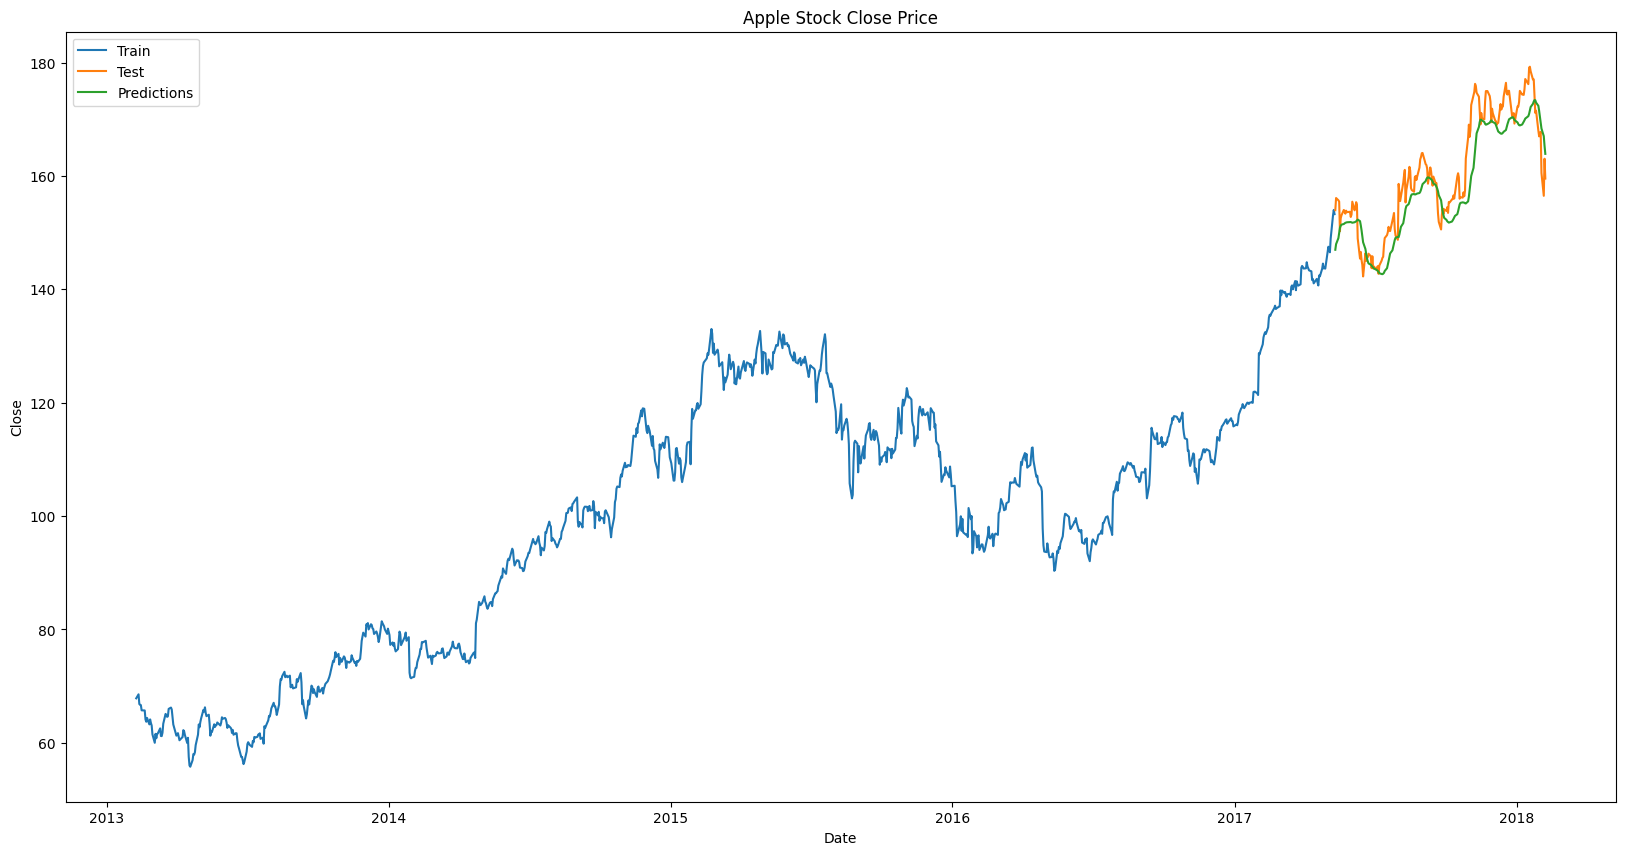

In [23]:
train = apple_df[:training_apple]
test = apple_df[training_apple:]
test["Predictions"] = predictions

plt.figure(figsize=(20,10))
plt.plot(train["date"], train["close"])
plt.plot(test["date"], test[["close", "Predictions"]])

plt.title("Apple Stock Close Price")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend(["Train", "Test", "Predictions"])

# Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2023-11-25       | 1.0     | Younes Dahami   |  initial version |
|
